# Weighted K-Means Clustering

In this exercise we will simulate finding good locations for production plants of a company in order to minimize its logistical costs. In particular, we would like to place production plants near customers so as to reduce shipping costs and delivery time.

We assume that the probability of someone being a customer is independent of its geographical location and that the overall cost of delivering products to customers is proportional to the squared Euclidean distance to the closest production plant. Under these assumptions, the K-Means algorithm is an appropriate method to find a good set of locations. Indeed, K-Means finds a spatial clustering of potential customers and the centroid of each cluster can be chosen to be the location of the plant.

Because there are potentially millions of customers, and that it is not scalable to model each customer as a data point in the K-Means procedure, we consider instead as many points as there are geographical locations, and assign to each geographical location a weight $w_i$ corresponding to the number of inhabitants at that location. The resulting problem becomes a weighted version of K-Means where we seek to minimize the objective:

$$
J(c_1,\dots,c_K) = \frac{\sum_{i} w_i \min_k ||x_i-c_k||^2}{\sum_{i} w_i},
$$

where $c_k$ is the $k$th centroid, and $w_i$ is the weight of each geographical coordinate $x_i$. In order to minimize this cost function, we iteratively perform the following EM computations:

* **Expectation step:** Compute the set of points associated to each centroid:
$$
\forall~1 \leq k \leq K: \quad \mathcal{C}(k) \leftarrow \Big\{ i ~:~ k = \mathrm{arg}\min_k \| x_i - c_k \|^2 \Big\}
$$


* **Minimization step:** Recompute the centroid as a the (weighted) mean of the associated data points:
$$
\forall~1 \leq k \leq K: \quad c_k \leftarrow \frac{\sum_{i \in \mathcal{C}(k)} w_i \cdot x_i}{\sum_{i \in \mathcal{C}(k)} w_i}
$$


until the objective $J(c_1,\dots,c_K)$ has converged.


## Getting started

In this exercise we will use data from http://sedac.ciesin.columbia.edu/, that we store in the files `data.mat` as part of the zip archive. The data contains for each geographical coordinates (latitude and longitude), the number of inhabitants and the corresponding country. Several variables and methods are provided in the file `utils.py`:


*  **`utils.population`** A 2D array with the number of inhabitants at each latitude/longitude.


*  **`utils.plot(latitudes,longitudes)`** Plot a list of centroids given as geographical coordinates in overlay to the population density map.

The code below plots three factories (white squares) with geographical coordinates (60,80),
(60,90),(60,100) given as input.

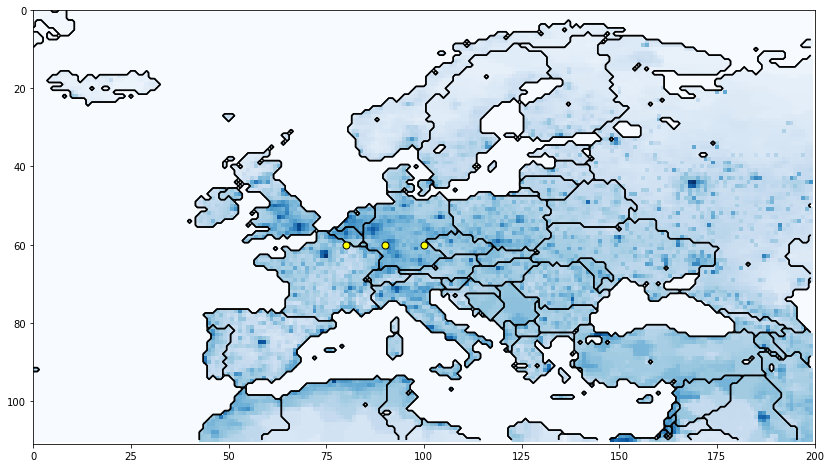

In [387]:
import utils, numpy
%matplotlib inline
utils.plot([60,60,60],[80,90,100])

Also, to get a dataset of geographical coordinates associated to the image given as an array, we can use:

In [388]:
x,y = numpy.indices(utils.population.shape)
locations = numpy.array([x.flatten(),y.flatten()]).T

In [389]:
locations

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [110, 197],
       [110, 198],
       [110, 199]])

## Initializing Weighted K-Means (25 P)

Because K-means has a non-convex objective, choosing a good initial set of centroids is important. Centroids are drawn from from the following discrete probability distribution:

$$
P(x,y) = \frac1Z \cdot \text{population}(x,y)
$$

where $Z$ is a normalization constant. Furthermore, to avoid identical centroids, we add a small Gaussian noise to the location of centroids, with standard deviation $0.01$.

**Task:**

* **Implement the initialization procedure above.**

In [400]:
def initialize(K,population):
    # YOUR CODE HERE
    n = population.shape[1]*population.shape[0]
    p = population / population.sum()
    idx = numpy.random.choice(n, size=K, p=p.flatten().tolist(),replace=False) 
    centroids = locations[idx]
    noise = numpy.random.normal(loc=0.0, scale=0.01, size=(K,2))
    return centroids + noise
    # --------------

The following code runs the initialization procedure for K=200 clusters and visualizes the centroids obtained with the initialization procedure using `utils.plot`.

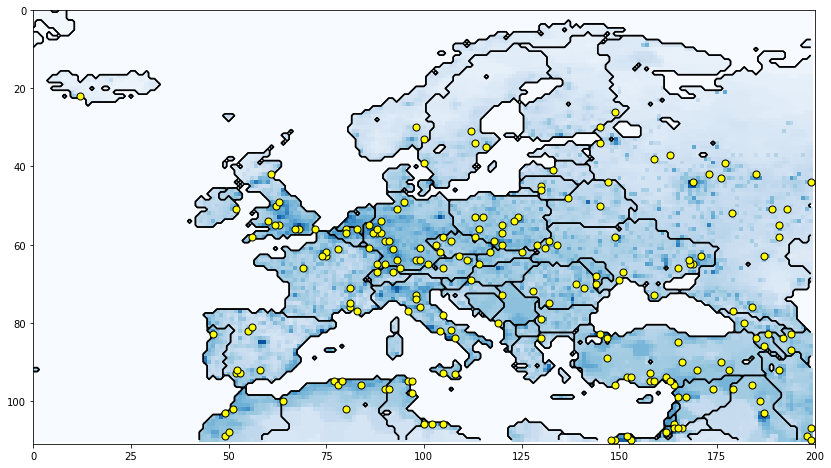

In [401]:
centroids_init = initialize(200, utils.population)
utils.plot(centroids_init[:,0], centroids_init[:,1])

## Implementing Weighted K-Means (75 P)

**Task:**


* **Implement the weighted K-Means algorithm. Your algorithm should run for `nbit` iterations and print the value of the objective after training. If `verbose`, it should also print the value of the objective at each iteration.**

In [398]:
def wkmeans(centroids, points, weights, verbose, nbit):

    c = copy.deepcopy(centroids)
    c = numpy.array(c)
    # YOUR CODE HERE
    for it in range(nbit+1):
        ## ESTIMATION STEP
        
        # compute distance matrix
        dist = numpy.linalg.norm(points[:,numpy.newaxis]-c,axis=-1)
        # compute argmin for each point
        argmin = numpy.argmin(dist,axis=1)
        
        # compute objective
        rows = numpy.arange(0,dist.shape[0])
        rows = numpy.repeat(rows.T[:,None],dist.shape[1],axis=1)
        columns = numpy.array([argmin]*dist.shape[1]).T
        
        J = (dist[rows,columns][:,0]*weights).sum()/weights.sum()
        
        if verbose and it<nbit+1:
            print(f"Iteration {it}: J = {J}")
        
        
        
        ## MINIMIZATION STEP
        cluster_dict = {}
        for i in range(len(centroids)):
            cluster_dict[i] = points[argmin==i]
            c[i] =  (weights[argmin==i][:,numpy.newaxis]*cluster_dict[i]).sum(axis=0)/weights[argmin==i].sum()
        
    print(f"Iteration {it}: J = {J}")
    return c
    # --------------

The following code runs the weighted k-means on this data, and displays the final centroids.

Iteration 0: J = 3.0978063327210963
Iteration 1: J = 2.480488430816494
Iteration 2: J = 2.3063913182326368
Iteration 3: J = 2.2093485886493425
Iteration 4: J = 2.1636183004098917
Iteration 5: J = 2.1416481454542353
Iteration 6: J = 2.1234963615864415
Iteration 7: J = 2.1113892210083924
Iteration 8: J = 2.105520442333274
Iteration 9: J = 2.1004597929422753
Iteration 10: J = 2.0978177343921924
Iteration 11: J = 2.096413233567945
Iteration 12: J = 2.0956576861935865
Iteration 13: J = 2.095014111898011
Iteration 14: J = 2.093569081482414
Iteration 15: J = 2.0926671240200485
Iteration 16: J = 2.0914578648014506
Iteration 17: J = 2.0895826097283834
Iteration 18: J = 2.087628945665839
Iteration 19: J = 2.086779287701111
Iteration 20: J = 2.086208671548167
Iteration 21: J = 2.086047419052748
Iteration 22: J = 2.085770348518625
Iteration 23: J = 2.085679695277135
Iteration 24: J = 2.0856577239397804
Iteration 25: J = 2.085691137496787
Iteration 26: J = 2.0855358133884665
Iteration 27: J = 2.085

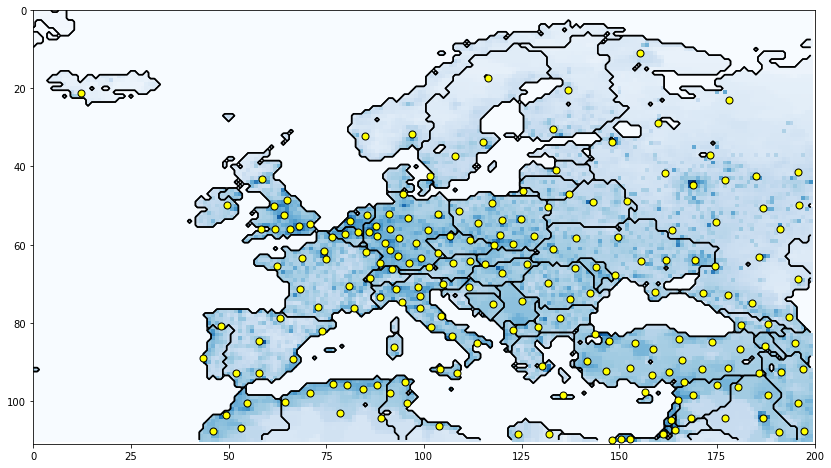

In [402]:
weights   = utils.population.flatten()*1.0

centroids = wkmeans(centroids_init, locations, weights, True, 50)

utils.plot(centroids[:,0], centroids[:,1])

Observe that the k-means algorithm is non-convex, and arrives in local optima of different quality depending on the initialization:

In [386]:
for i in range(5):
    wkmeans(initialize(200, utils.population), locations, weights, False, 50)

Iteration 50: J = 2.084124601905934
Iteration 50: J = 2.1108789445530878
Iteration 50: J = 2.118427541516334
Iteration 50: J = 2.1777230929648796
Iteration 50: J = 2.1465426034121835
